<a href="https://colab.research.google.com/github/M-Sparsh-Mehra/LST-time-series-data-forcasting-using-MLR--Reproduced-Paper-/blob/main/RNN_on_LST_paper_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preproc.
(done in previous model)

In [ ]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
dataset=pd.read_csv("/content/datalst.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            907 non-null    object 
 1   10:30a.m.(Terra Day-MOD11A2)    881 non-null    float64
 2   01:30p.m.(Aqua Day-MYD11A2)     888 non-null    float64
 3   10:30p.m.(Terra Night-MOD11A2)  866 non-null    float64
 4   01:30a.m.(Aqua Night-MOD11A2)   872 non-null    float64
dtypes: float64(4), object(1)
memory usage: 35.6+ KB


In [ ]:
dataset.dropna(subset=['01:30a.m.(Aqua Night-MOD11A2)'], inplace=True)

In [ ]:
X=dataset.iloc[:,1:4]   #independent parameters
Y=dataset.iloc[:,-1]    #dependent parameter

In [ ]:
print(np.isnan(X).sum())

10:30a.m.(Terra Day-MOD11A2)      12
01:30p.m.(Aqua Day-MYD11A2)        5
10:30p.m.(Terra Night-MOD11A2)    20
dtype: int64


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
X=imputer.fit_transform(X)

In [ ]:
print(np.isnan(X).sum())

0


In [ ]:
df = pd.DataFrame(np.column_stack([X,Y]))
df.columns =['TD', 'AD', 'TN', 'AN']
df

,TD,AD,TN,AN
0,308.33,312.10,298.58,295.10
1,313.00,316.87,298.91,297.93
2,307.63,308.92,295.40,293.31
3,309.62,316.32,295.70,295.73
4,306.94,309.09,294.32,293.05
...,...,...,...,...
867,300.35,304.70,286.04,284.74
868,302.20,306.13,289.03,287.26
869,303.69,307.75,289.40,286.94
870,307.42,310.53,291.75,290.16


#Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,SimpleRNN
from tensorflow.keras.layers import Dense,Dropout

# Implimentation

## Data split

In [ ]:
X=df.iloc[:,0:3]   #independent parameters
Y=df.iloc[:,-1]

In [ ]:
print(X,Y)

         TD      AD      TN
0    308.33  312.10  298.58
1    313.00  316.87  298.91
2    307.63  308.92  295.40
3    309.62  316.32  295.70
4    306.94  309.09  294.32
..      ...     ...     ...
867  300.35  304.70  286.04
868  302.20  306.13  289.03
869  303.69  307.75  289.40
870  307.42  310.53  291.75
871  312.20  316.34  296.37

[872 rows x 3 columns] 0      295.10
1      297.93
2      293.31
3      295.73
4      293.05
        ...  
867    284.74
868    287.26
869    286.94
870    290.16
871    295.17
Name: AN, Length: 872, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
y_train = y_train.to_numpy()
y_train=y_train.reshape(-1,1)
scaler = MinMaxScaler()
y_train=scaler.fit_transform(y_train)
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
print(x_train)
print(len(x_train))

[[0.39491631 0.41164591 0.27612851]
 [0.92591445 0.91551666 0.8645791 ]
 [0.47148171 0.46314372 0.72631151]
 ...
 [0.69807812 0.64187142 0.55632371]
 [0.78952263 0.78020868 0.81618544]
 [0.44141352 0.37361158 0.43594957]]
697


In [ ]:
print(len(y_train))

697


In [ ]:
len(y_test)

175

# Model implementation

In [ ]:
model=Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(3, 1)))
model.add(Dropout(0.2))

model.add(LSTM(50, activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=optimizer, loss='mse')

# fit model
model.fit(x_train, y_train,epochs=100,verbose=1)

Epoch 1/100
22/22 [==============================] - 4s 14ms/step - loss: 0.2653
Epoch 2/100
22/22 [==============================] - 0s 12ms/step - loss: 0.0801
Epoch 3/100
22/22 [==============================] - 0s 12ms/step - loss: 0.0420
Epoch 4/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0365
Epoch 5/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0345
Epoch 6/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0317
Epoch 7/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0309
Epoch 8/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0293
Epoch 9/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 10/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 11/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0265
Epoch 12/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0260
Epoch 13/100
22/22 [=======

In [ ]:
'''model=Sequential()
model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(3, 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(50, activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=optimizer, loss='mse')

# fit model
model.fit(x_train, y_train,epochs=100,verbose=1)'''

"model=Sequential()\nmodel.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(3, 1)))\nmodel.add(Dropout(0.2))\n\nmodel.add(SimpleRNN(50, activation='relu',return_sequences=True))\nmodel.add(Dropout(0.2))\n\nmodel.add(SimpleRNN(50, activation='relu'))\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(1))\noptimizer = tf.keras.optimizers.Adam(lr=0.00001)\nmodel.compile(optimizer=optimizer, loss='mse')\n\n# fit model\nmodel.fit(x_train, y_train,epochs=100,verbose=1)"

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 3, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 3, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 3, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

now we need to find out the temp for next instances

scaling new data with same scaler object before

In [ ]:
x_test = scaler.fit_transform(x_test)
y_test = y_test.to_numpy()
y_test=scaler.fit_transform(y_test.reshape(-1,1))

## Test set results

result outputted as out_test


In [ ]:
x=x_test[0]
out=[] ##predicted output list
print(x)
for i in range(len(y_test)):
    x=x_test[i]
    x=x.reshape(1,3,1)
    print(x)
    temp=model.predict(x)
    print(temp)
    '''x[0][0]=x[0][1]
    x[0][1]=x[0][2]          #to remove previous temperature
    x[0][2]=(temp)'''
    #to add generated prediction to the grid
    out.append(temp)
    #print(temp)


[0.57511211 0.53831914 0.83697167]
[[[0.57511211]
  [0.53831914]
  [0.83697167]]]
1/1 [==============================] - 0s 427ms/step
[[0.7490138]]
[[[0.27391629]
  [0.2661977 ]
  [0.39433349]]]
1/1 [==============================] - 0s 24ms/step
[[0.30841988]]
[[[0.74701046]
  [0.7082562 ]
  [0.68601951]]]
1/1 [==============================] - 0s 21ms/step
[[0.710937]]
[[[0.49813154]
  [0.42835987]
  [0.43195541]]]
1/1 [==============================] - 0s 20ms/step
[[0.40291035]]
[[[0.06988042]
  [0.01851166]
  [0.12540641]]]
1/1 [==============================] - 0s 24ms/step
[[0.12147108]]
[[[0.84977578]
  [0.84265087]
  [0.93450999]]]
1/1 [==============================] - 0s 23ms/step
[[0.8842559]]
[[[0.57623318]
  [0.53905961]
  [0.53599628]]]
1/1 [==============================] - 0s 20ms/step
[[0.54112256]]
[[[0.7922272 ]
  [0.70529434]
  [0.54760799]]]
1/1 [==============================] - 0s 24ms/step
[[0.5370657]]
[[[0.84790732]
  [0.82599037]
  [0.93450999]]]
1/1 [=====

In [ ]:
print(out)
print(len(out))
print(len(y_test))
out= [i[0][0] for i in out]

[array([[0.7490138]], dtype=float32), array([[0.30841988]], dtype=float32), array([[0.710937]], dtype=float32), array([[0.40291035]], dtype=float32), array([[0.12147108]], dtype=float32), array([[0.8842559]], dtype=float32), array([[0.54112256]], dtype=float32), array([[0.5370657]], dtype=float32), array([[0.88066924]], dtype=float32), array([[0.21357307]], dtype=float32), array([[0.8975543]], dtype=float32), array([[0.08167077]], dtype=float32), array([[0.77812296]], dtype=float32), array([[0.6957405]], dtype=float32), array([[0.5276857]], dtype=float32), array([[0.9176949]], dtype=float32), array([[0.3913822]], dtype=float32), array([[0.7614772]], dtype=float32), array([[0.7348626]], dtype=float32), array([[0.12758195]], dtype=float32), array([[0.83432084]], dtype=float32), array([[0.7722454]], dtype=float32), array([[0.160859]], dtype=float32), array([[0.25929677]], dtype=float32), array([[0.24242835]], dtype=float32), array([[0.2484504]], dtype=float32), array([[0.38244477]], dtype

In [ ]:
y_actual=y_test[::2]
y_pred=out[::2]

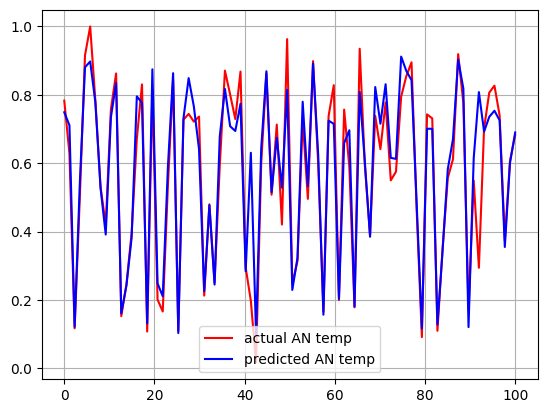

In [ ]:
time=np.linspace(0,100,len(y_pred))
mp.plot(time,y_actual,color="red",label="actual AN temp")
mp.plot(time,y_pred,color="blue",label="predicted AN temp")
mp.legend()
mp.grid()
mp.show()

## Train Set Results


In [ ]:
y_train=list(y_train)
y_train= [i[0] for i in y_train]

In [ ]:
out1=[] ##predicted output list
for i in range(len(y_train[600:])):
    x1=x_train[600+i]
    x1=x1.reshape(1,3,1)
    temp=model.predict(x1)
    print(temp)       #to add generated prediction to the grid
    out1.append(temp)

1/1 [==============================] - 0s 29ms/step
[[0.5623586]]
1/1 [==============================] - 0s 34ms/step
[[0.7910673]]
1/1 [==============================] - 0s 35ms/step
[[0.71562314]]
1/1 [==============================] - 0s 38ms/step
[[0.41131407]]
1/1 [==============================] - 0s 33ms/step
[[0.75839174]]
1/1 [==============================] - 0s 45ms/step
[[0.72849196]]
1/1 [==============================] - 0s 39ms/step
[[0.24449825]]
1/1 [==============================] - 0s 29ms/step
[[0.8662969]]
1/1 [==============================] - 0s 30ms/step
[[0.23177649]]
1/1 [==============================] - 0s 37ms/step
[[0.8982204]]
1/1 [==============================] - 0s 31ms/step
[[0.70902234]]
1/1 [==============================] - 0s 33ms/step
[[0.8359256]]
1/1 [==============================] - 0s 38ms/step
[[0.6885682]]
1/1 [==============================] - 0s 37ms/step
[[0.5681856]]
1/1 [==============================] - 0s 30ms/step
[[0.8256462]]
1/1

In [ ]:
print(out1)
out1= [i[0][0] for i in out1]
print(out1)

[array([[0.5623586]], dtype=float32), array([[0.7910673]], dtype=float32), array([[0.71562314]], dtype=float32), array([[0.41131407]], dtype=float32), array([[0.75839174]], dtype=float32), array([[0.72849196]], dtype=float32), array([[0.24449825]], dtype=float32), array([[0.8662969]], dtype=float32), array([[0.23177649]], dtype=float32), array([[0.8982204]], dtype=float32), array([[0.70902234]], dtype=float32), array([[0.8359256]], dtype=float32), array([[0.6885682]], dtype=float32), array([[0.5681856]], dtype=float32), array([[0.8256462]], dtype=float32), array([[0.64939755]], dtype=float32), array([[0.14717086]], dtype=float32), array([[0.6833603]], dtype=float32), array([[0.9299178]], dtype=float32), array([[0.37687778]], dtype=float32), array([[0.7232824]], dtype=float32), array([[0.31357363]], dtype=float32), array([[0.26433945]], dtype=float32), array([[0.6531129]], dtype=float32), array([[0.23744956]], dtype=float32), array([[0.23542646]], dtype=float32), array([[0.14763714]], d

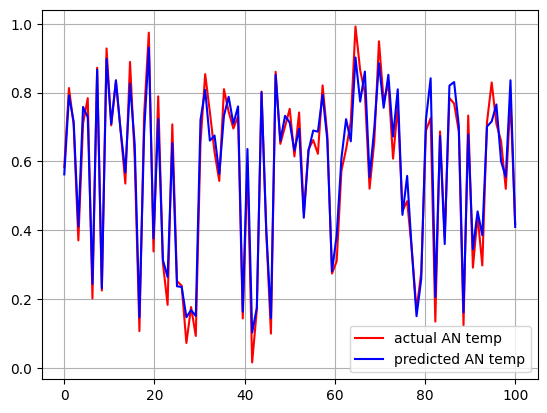

In [ ]:
time=np.linspace(0,100,len(y_train[600:]))
mp.plot(time,y_train[600:],color="red",label="actual AN temp")
mp.plot(time,out1,color="blue",label="predicted AN temp")
mp.legend()
mp.grid()
mp.show()